#Reading dataset


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving crop_production.csv to crop_production (1).csv


In [ ]:
import io

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['crop_production.csv']))

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
#getting some basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Reducing the data into one state for ease

In [ ]:
df=df[df['State_Name']=="Maharashtra"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 125191 to 137818
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     12628 non-null  object 
 1   District_Name  12628 non-null  object 
 2   Crop_Year      12628 non-null  int64  
 3   Season         12628 non-null  object 
 4   Crop           12628 non-null  object 
 5   Area           12628 non-null  float64
 6   Production     12496 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 789.2+ KB


In [ ]:
#to check any null values
df.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       132
dtype: int64

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0


Correlation HeatMap

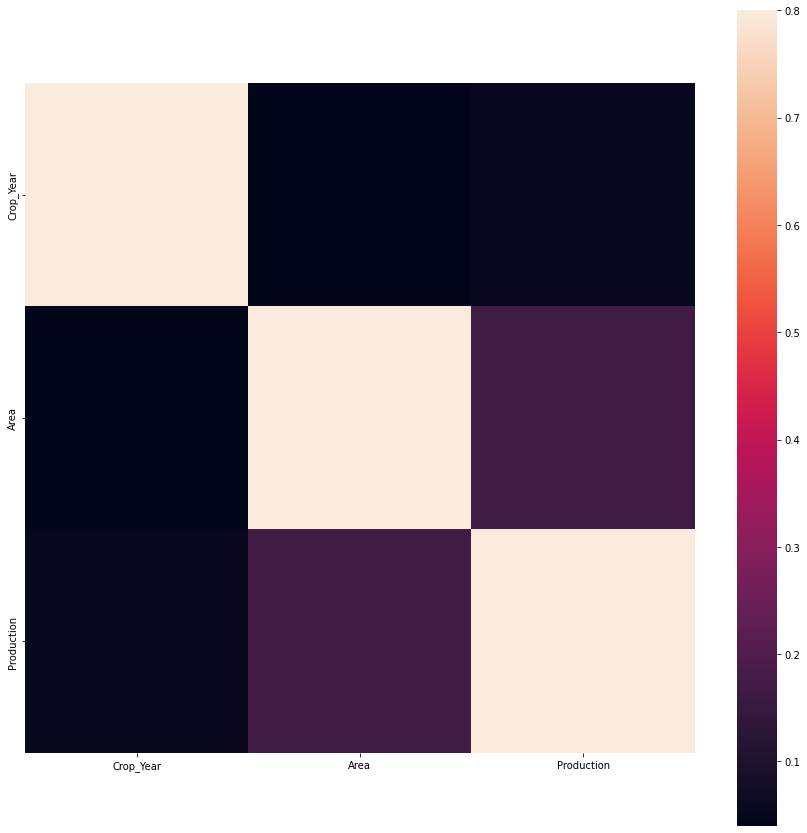

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
C_mat=df.corr()
fig=plt.figure(figsize=(15,15))
sb.heatmap(C_mat,vmax=.8,square=True)
plt.show()


#taking data only after 2004 because the data after 2004 is affecting the result

In [ ]:
df=df[df['Crop_Year']>=2004]
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200.0,4800.0
125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500.0,143400.0
125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300.0,3900.0
125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100.0,100.0
125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400.0,14000.0
...,...,...,...,...,...,...,...
137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,3300.0
137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,200.0
137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,26800.0
137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,11500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 125403 to 137818
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     7255 non-null   object 
 1   District_Name  7255 non-null   object 
 2   Crop_Year      7255 non-null   int64  
 3   Season         7255 non-null   object 
 4   Crop           7255 non-null   object 
 5   Area           7255 non-null   float64
 6   Production     7143 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 453.4+ KB


converting data into numerical form

In [ ]:
df1=pd.get_dummies(df['District_Name'])
df=pd.concat([df,df1],axis=1).reindex(df.index)
df.drop('District_Name',axis=1,inplace=True)
df

,State_Name,Crop_Year,Season,Crop,Area,Production,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,...,RAIGAD,RATNAGIRI,SANGLI,SATARA,SINDHUDURG,SOLAPUR,THANE,WARDHA,WASHIM,YAVATMAL
125403,Maharashtra,2004,Kharif,Arhar/Tur,12200.0,4800.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125404,Maharashtra,2004,Kharif,Bajra,240500.0,143400.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125405,Maharashtra,2004,Kharif,Groundnut,5300.0,3900.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125406,Maharashtra,2004,Kharif,Jowar,100.0,100.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125407,Maharashtra,2004,Kharif,Maize,11400.0,14000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,Maharashtra,2014,Rabi,Jowar,4000.0,3300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
137815,Maharashtra,2014,Rabi,Maize,1300.0,200.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
137816,Maharashtra,2014,Rabi,Wheat,29100.0,26800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
137817,Maharashtra,2014,Summer,Groundnut,9400.0,11500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1=pd.get_dummies(df['State_Name'])
df=pd.concat([df,df1],axis=1).reindex(df.index)
df.drop('State_Name',axis=1,inplace=True)
df

,Crop_Year,Season,Crop,Area,Production,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,...,RATNAGIRI,SANGLI,SATARA,SINDHUDURG,SOLAPUR,THANE,WARDHA,WASHIM,YAVATMAL,Maharashtra
125403,2004,Kharif,Arhar/Tur,12200.0,4800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
125404,2004,Kharif,Bajra,240500.0,143400.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
125405,2004,Kharif,Groundnut,5300.0,3900.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
125406,2004,Kharif,Jowar,100.0,100.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
125407,2004,Kharif,Maize,11400.0,14000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,2014,Rabi,Jowar,4000.0,3300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
137815,2014,Rabi,Maize,1300.0,200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
137816,2014,Rabi,Wheat,29100.0,26800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
137817,2014,Summer,Groundnut,9400.0,11500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df1=pd.get_dummies(df['Crop'])
df=pd.concat([df,df1],axis=1).reindex(df.index)
df.drop('Crop',axis=1,inplace=True)
df

,Crop_Year,Season,Area,Production,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,BHANDARA,...,Rice,Safflower,Sesamum,Soyabean,Sugarcane,Sunflower,Tobacco,Urad,Wheat,other oilseeds
125403,2004,Kharif,12200.0,4800.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125404,2004,Kharif,240500.0,143400.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125405,2004,Kharif,5300.0,3900.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125406,2004,Kharif,100.0,100.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125407,2004,Kharif,11400.0,14000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,2014,Rabi,4000.0,3300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137815,2014,Rabi,1300.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137816,2014,Rabi,29100.0,26800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137817,2014,Summer,9400.0,11500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1=pd.get_dummies(df['Season'])
df=pd.concat([df,df1],axis=1).reindex(df.index)
df.drop('Season',axis=1,inplace=True)
df

,Crop_Year,Area,Production,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,BHANDARA,BULDHANA,...,Sugarcane,Sunflower,Tobacco,Urad,Wheat,other oilseeds,Kharif,Rabi,Summer,Whole Year
125403,2004,12200.0,4800.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125404,2004,240500.0,143400.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125405,2004,5300.0,3900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125406,2004,100.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125407,2004,11400.0,14000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,2014,4000.0,3300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
137815,2014,1300.0,200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
137816,2014,29100.0,26800.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
137817,2014,9400.0,11500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df['Yield']=df['Production']/df['Area']
df

,Crop_Year,Area,Production,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,BHANDARA,BULDHANA,...,Sunflower,Tobacco,Urad,Wheat,other oilseeds,Kharif,Rabi,Summer,Whole Year,Yield
125403,2004,12200.0,4800.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.393443
125404,2004,240500.0,143400.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.596258
125405,2004,5300.0,3900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.735849
125406,2004,100.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.000000
125407,2004,11400.0,14000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,2014,4000.0,3300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.825000
137815,2014,1300.0,200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.153846
137816,2014,29100.0,26800.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0.920962
137817,2014,9400.0,11500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.223404


In [ ]:
#deleting the unnecessary columns
df=df.drop('Production', axis=1)

In [ ]:
df

,Crop_Year,Area,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,BHANDARA,BULDHANA,CHANDRAPUR,...,Sunflower,Tobacco,Urad,Wheat,other oilseeds,Kharif,Rabi,Summer,Whole Year,Yield
125403,2004,12200.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.393443
125404,2004,240500.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.596258
125405,2004,5300.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.735849
125406,2004,100.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.000000
125407,2004,11400.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,2014,4000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.825000
137815,2014,1300.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.153846
137816,2014,29100.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0.920962
137817,2014,9400.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.223404


Preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:
#create x, where x the 'scores' column's values as floats
x=df[['Area']].values.astype(float)
x
#create a minimum and maximum processor object
min_max_scaler=preprocessing.MinMaxScaler()
#create a object to transform the data to fit minmax processor
x_scaled=min_max_scaler.fit_transform(x)
#run the normaliser on the dataframe
#df_normalised=pd.dataframe(x_scaled)
x_scaled
df['Area']=x_scaled
df

,Crop_Year,Area,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,BHANDARA,BULDHANA,CHANDRAPUR,...,Sunflower,Tobacco,Urad,Wheat,other oilseeds,Kharif,Rabi,Summer,Whole Year,Yield
125403,2004,0.017150,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.393443
125404,2004,0.338112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.596258
125405,2004,0.007450,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.735849
125406,2004,0.000139,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.000000
125407,2004,0.016026,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137814,2014,0.005622,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.825000
137815,2014,0.001826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.153846
137816,2014,0.040910,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0.920962
137817,2014,0.013214,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.223404


filling empty values with mean

In [ ]:
df=df.fillna(df.mean())

Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
a=df

In [ ]:
b=df['Yield']

In [ ]:
a=a.drop('Yield', axis =1)

In [ ]:
len(a.columns)

67

In [ ]:
a.columns

Index(['Crop_Year', 'Area', 'AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD',
       'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI',
       'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR', 'NAGPUR',
       'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD', 'PALGHAR', 'PARBHANI',
       'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI', 'SATARA', 'SINDHUDURG',
       'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM', 'YAVATMAL', 'Maharashtra',
       'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Gram',
       'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Cereals & Millets',
       'Other Kharif pulses', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower',
       'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tobacco', 'Urad',
       'Wheat', 'other oilseeds', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year '],
      dtype='object')

In [ ]:
features_list=['Crop_Year', 'Area', 'AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD',
       'BEED', 'BHANDARA', 'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI',
       'GONDIA', 'HINGOLI', 'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR', 'NAGPUR',
       'NANDED', 'NANDURBAR', 'NASHIK', 'OSMANABAD', 'PALGHAR', 'PARBHANI',
       'PUNE', 'RAIGAD', 'RATNAGIRI', 'SANGLI', 'SATARA', 'SINDHUDURG',
       'SOLAPUR', 'THANE', 'WARDHA', 'WASHIM', 'YAVATMAL', 'Maharashtra',
       'Arhar/Tur', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Gram',
       'Groundnut', 'Jowar', 'Linseed', 'Maize', 'Moong(Green Gram)',
       'Niger seed', 'Other  Rabi pulses', 'Other Cereals & Millets',
       'Other Kharif pulses', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower',
       'Sesamum', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tobacco', 'Urad',
       'Wheat', 'other oilseeds', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Whole Year ']

In [ ]:
features_list123=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
len(features_list123)

67

In [ ]:
len(features_list)

67

In [ ]:
a.head()

,Crop_Year,Area,AHMEDNAGAR,AKOLA,AMRAVATI,AURANGABAD,BEED,BHANDARA,BULDHANA,CHANDRAPUR,...,Sugarcane,Sunflower,Tobacco,Urad,Wheat,other oilseeds,Kharif,Rabi,Summer,Whole Year
125403,2004,0.017150,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125404,2004,0.338112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125405,2004,0.007450,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125406,2004,0.000139,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
125407,2004,0.016026,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=42)
print(a_train)
print(a_test)
print(b_train)
print(b_test)

        Crop_Year      Area  AHMEDNAGAR  AKOLA  AMRAVATI  AURANGABAD  BEED  \
133387       2008  0.058343           0      0         0           0     0   
126865       2014  0.058764           0      0         0           1     0   
132853       2005  0.013354           0      0         0           0     0   
127923       2009  0.002389           0      0         0           0     0   
137779       2012  0.083789           0      0         0           0     0   
...           ...       ...         ...    ...       ...         ...   ...   
131772       2014  0.000702           0      0         0           0     0   
134311       2006  0.007731           0      0         0           0     0   
134346       2008  0.003935           0      0         0           0     0   
134510       2014  0.000420           0      0         0           0     0   
126773       2010  0.015604           0      0         0           1     0   

        BHANDARA  BULDHANA  CHANDRAPUR  ...  Sugarcane  Sunflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

In [ ]:
###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr =RandomForestRegressor(max_depth=2 ,random_state=0,n_estimators=100)
regr.fit(a_train,b_train)
b_pred=regr.predict(a_test)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

print('MSE =' , mse(b_pred,b_test))
print('MAE =' , mae(b_pred,b_test))
print('R2 Score =' , r2_score(b_pred,b_test))


MSE = 7.67104887996405
MAE = 0.8953650873829122
R2 Score = 0.9589614680509005


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
b_test = list(b_test)

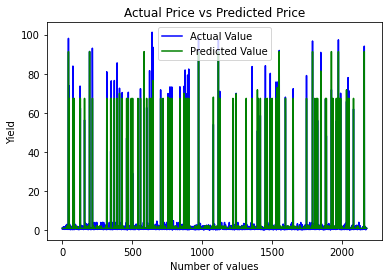

In [ ]:
plt.plot(b_test, color='blue', label = 'Actual Value')
plt.plot(b_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Yield')
plt.legend()
plt.show()

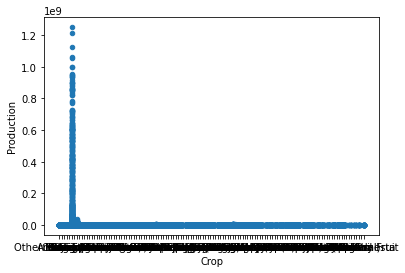

In [ ]:
#showing graphs
import matplotlib.pyplot as plt


df.plot(x='Crop',y='Production',kind='scatter')
plt.show()